<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Dhruv/SBT_Graphs_Dhruv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CP-01 Data Alchemists
# Seoul Bike Trip

> Visualizing Data Using Plots

Loading Dataset from Google Drive

In [1]:
! gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/CP01.zip
100% 630M/630M [00:05<00:00, 107MB/s] 


In [2]:
!unzip /content/CP01.zip

Archive:  /content/CP01.zip
  inflating: For_modeling.csv        
  inflating: cleaned_seoul_bike_data.csv  


## Data Visualization

> Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

> Storing the Dataset in a dataframe

In [5]:
df = pd.read_csv("/content/For_modeling.csv",index_col=0)
df = df.reset_index().drop(columns=['index'])
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


> Getting Information about the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


In [7]:
numeric_stats = df.describe()

# Summary of the statistics
print(numeric_stats)

           Duration      Distance         PLong         PLatd         DLong  \
count  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06   
mean   2.580294e+01  3.713519e+03  3.754761e+01  1.269908e+02  3.754770e+01   
std    2.504333e+01  3.956611e+03  4.441376e-02  8.257065e-02  4.445305e-02   
min    1.000000e+00  1.000000e+00  3.743727e+01  1.267986e+02  3.743727e+01   
25%    8.000000e+00  1.230000e+03  3.751424e+01  1.269200e+02  3.751424e+01   
50%    1.600000e+01  2.280000e+03  3.754693e+01  1.269943e+02  3.754655e+01   
75%    3.600000e+01  4.620000e+03  3.757324e+01  1.270618e+02  3.757324e+01   
max    1.190000e+02  3.329000e+04  3.768972e+01  1.271803e+02  3.768972e+01   

              DLatd     Haversine        Pmonth          Pday         Phour  \
count  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06   
mean   1.269907e+02  1.870315e+00  7.578754e+00  1.576714e+01  1.437801e+01   
std    8.323726e-02  1.995361e+00  2.696797e+00  8.

# Plotting the Dataset

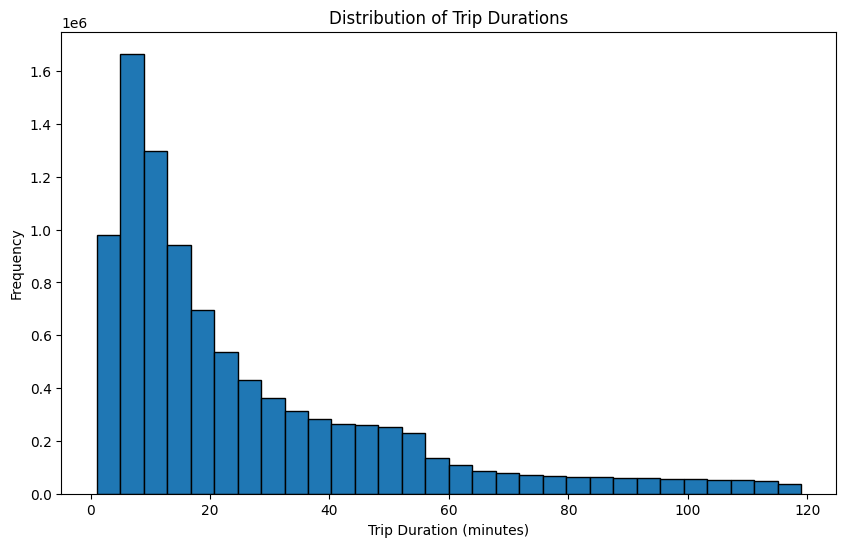

In [11]:
# Histogram of trip duration
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'], bins=30, edgecolor='k')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()


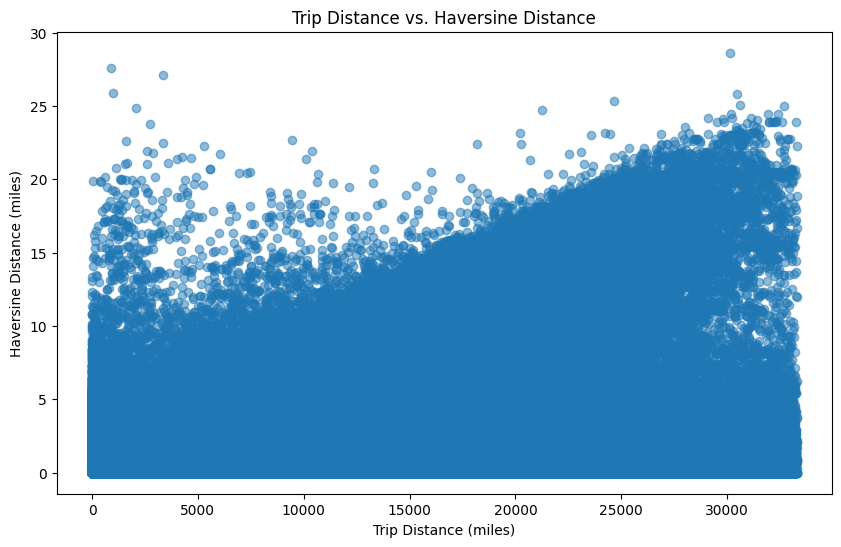

In [12]:
# Scatter plot of trip distance vs. haversine distance
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Haversine'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Haversine Distance (miles)')
plt.title('Trip Distance vs. Haversine Distance')
plt.show()


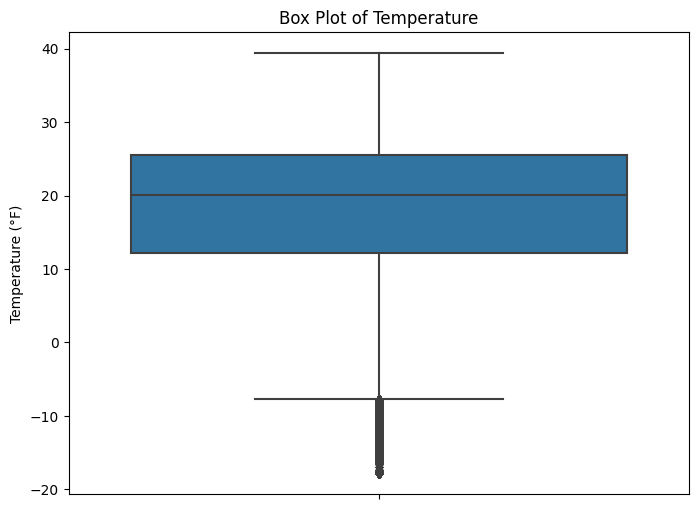

In [13]:
# Box plot of temperature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Temp')
plt.ylabel('Temperature (°F)')
plt.title('Box Plot of Temperature')
plt.show()


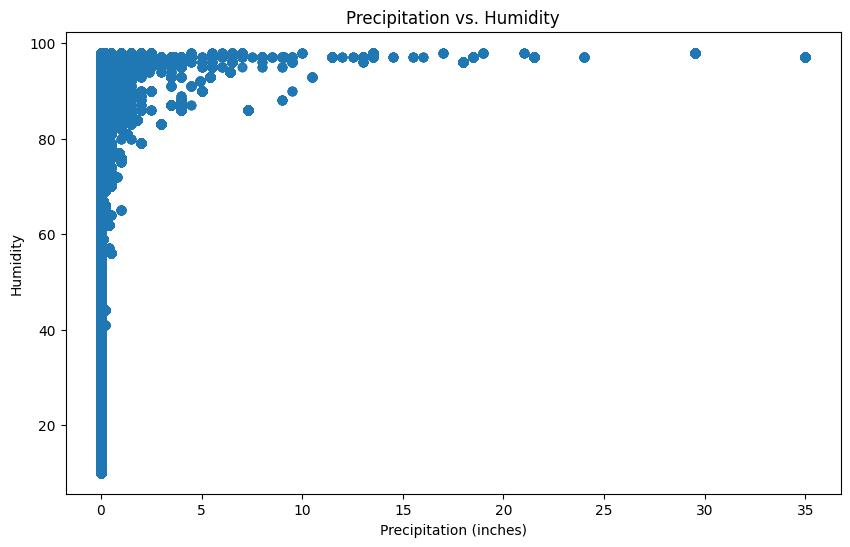

In [14]:
# Scatter plot of precipitation vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['Precip'], df['Humid'], alpha=0.5)
plt.xlabel('Precipitation (inches)')
plt.ylabel('Humidity')
plt.title('Precipitation vs. Humidity')
plt.show()


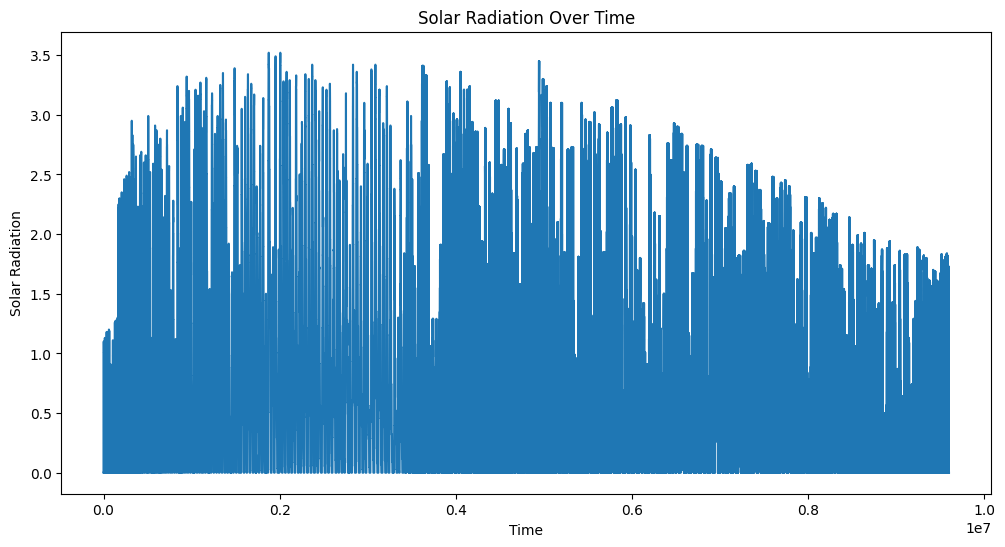

In [15]:
# Line plot of solar radiation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Solar'])
plt.xlabel('Time')
plt.ylabel('Solar Radiation')
plt.title('Solar Radiation Over Time')
plt.show()


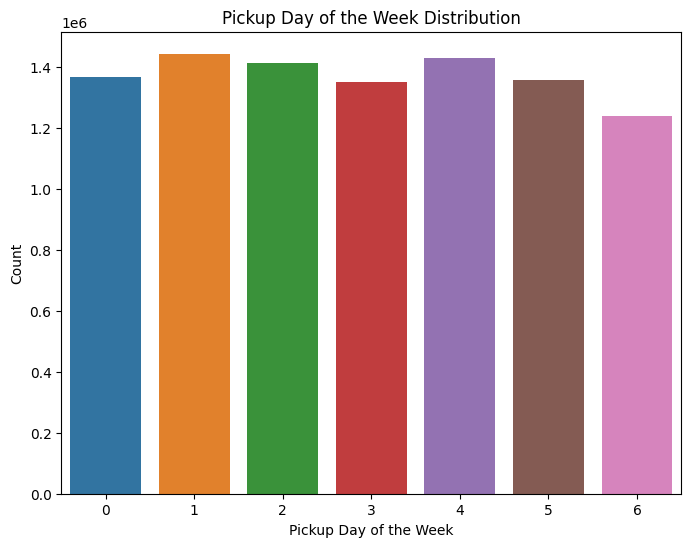

In [16]:
# Bar plot of pickup day of the week counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PDweek')
plt.xlabel('Pickup Day of the Week')
plt.ylabel('Count')
plt.title('Pickup Day of the Week Distribution')
plt.show()



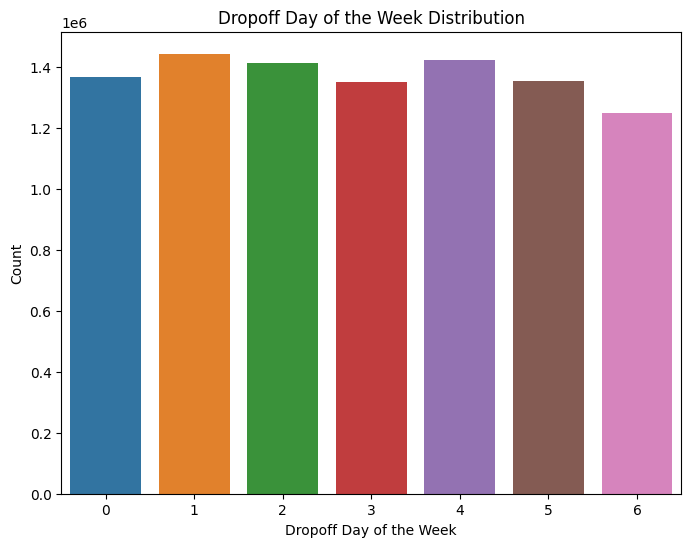

In [17]:
# Bar plot of dropoff day of the week counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DDweek')
plt.xlabel('Dropoff Day of the Week')
plt.ylabel('Count')
plt.title('Dropoff Day of the Week Distribution')
plt.show()

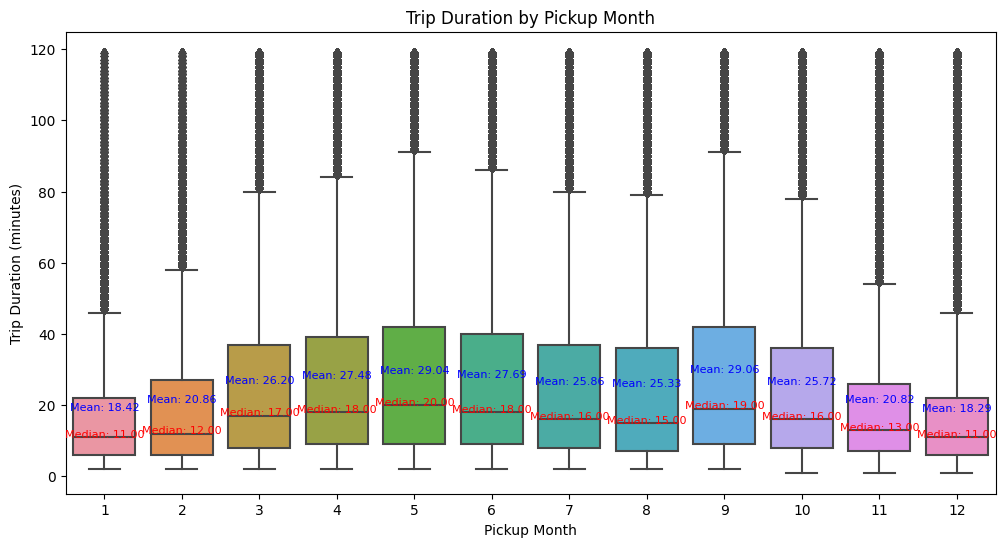

In [27]:
# Box plot of trip duration by month
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='Pmonth', y='Duration')
plt.xlabel('Pickup Month')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration by Pickup Month')

for i, month in enumerate(sorted(df['Pmonth'].unique())):
    subset = df[df['Pmonth'] == month]
    mean = subset['Duration'].mean()
    median = subset['Duration'].median()

    ax.text(i, mean, f'Mean: {mean:.2f}', ha='center', fontsize=8, color='b')
    ax.text(i, median, f'Median: {median:.2f}', ha='center', fontsize=8, color='r')

plt.xticks(range(len(sorted(df['Pmonth'].unique()))), sorted(df['Pmonth'].unique()))
plt.show()

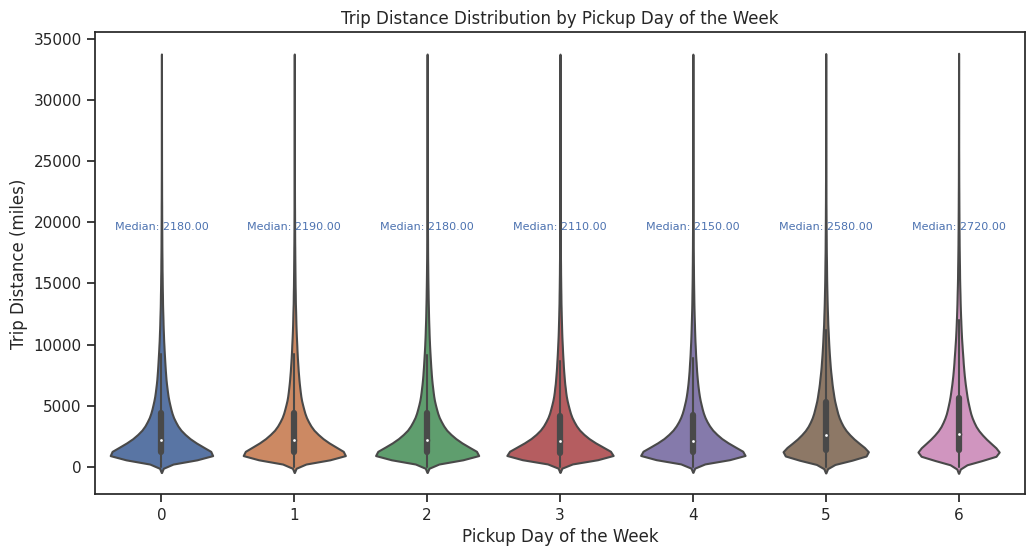

In [37]:
# Violin plot of trip distance by day of the week
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df, x='PDweek', y='Distance')
plt.xlabel('Pickup Day of the Week')
plt.ylabel('Trip Distance (miles)')
plt.title('Trip Distance Distribution by Pickup Day of the Week')

medians = df.groupby('PDweek')['Distance'].median()
for i, median in enumerate(medians):
    ax.text(i, 20000, f'Median: {median:.2f}', ha='center', va='top', fontsize=8, color='b')

plt.show()

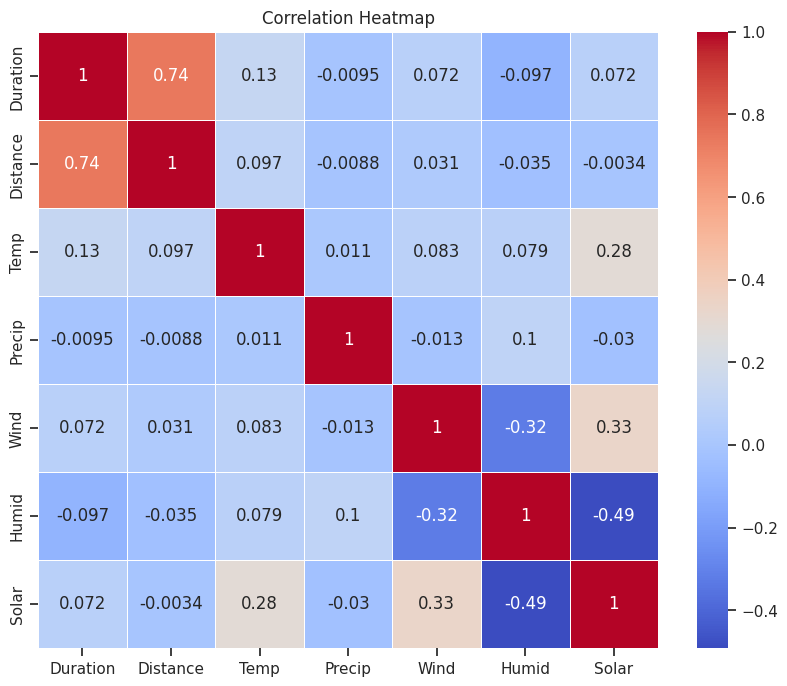

In [29]:
# Heatmap for correlation matrix
correlation_matrix = df[['Duration', 'Distance', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


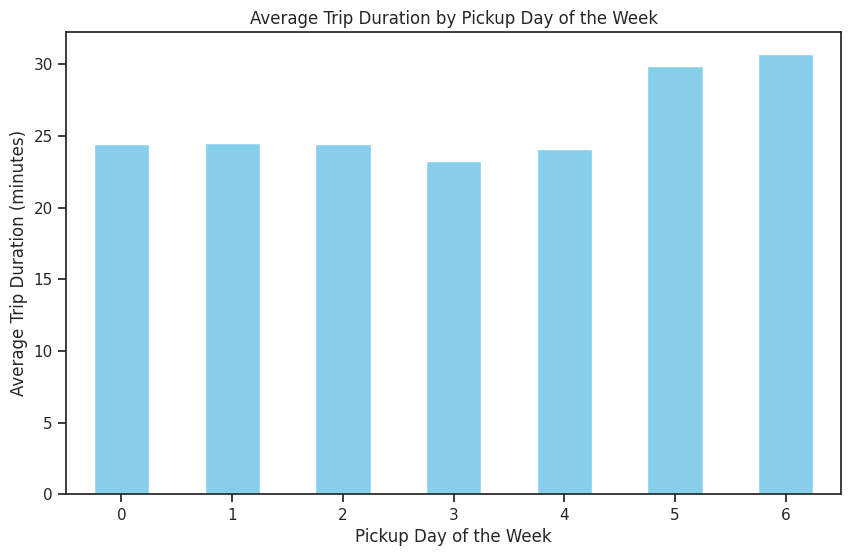

In [30]:
# Grouped bar plot for average trip duration by pickup day of the week
avg_duration_by_day = df.groupby('PDweek')['Duration'].mean()
plt.figure(figsize=(10, 6))
avg_duration_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Pickup Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Pickup Day of the Week')
plt.xticks(rotation=0)
plt.show()